# COGS 108 - Final Project

# Overview
For our final project, we decided to observe news sources and their headlines to measure the sentiment and see whether more political sources tend to have more polar sentiment. To do this, we picked three news publications from three different parts of the political spectrum, CNN, Breitbart, and NPR. We found that our initial hypothesis, that the two more politcally polar sources, CNN and Breitbart, would be more polar in sentiment, and that NPR would be more neutral, was correct. 

# Names
- Bridget Egan 
- Dillan Merchant
- Jennifer Hang
- Sam Zakeri
- Connie Chang

# Research Question

**How are American news headline sentiments correlated to their publication source's political leanings?** To do this, we wanted three sources that reflected 'far-left', 'centrist', and 'far-right' political leanings. Using both AllSides and MediaBiasFactCheck, Breitbart was evaluated as the most right-leaning news source of our dataset, CNN was evaluated as the most left-leaning news source, and NPR was evaluated as the most politically-centrist news source [1, 2, 3, 4, 5, 6, 7]. *We hypothesize that the two more politically polar news sources, Breitbart and CNN, will have more polar sentiment (as in frequently positive or negative), and the more centrist news source, NPR, will be more neutral in sentiment.*
- [1] https://www.allsides.com/news-source/cnn-media-bias
- [2] https://mediabiasfactcheck.com/cnn/
- [3] https://mediabiasfactcheck.com/npr/
- [4] https://www.allsides.com/news-source/npr-media-bias
- [5] https://www.allsides.com/news-source/breitbart
- [6] https://mediabiasfactcheck.com/breitbart/
- [7] https://www.adfontesmedia.com/static-mbc/

## Background and Prior Work
It is well-known that author bias of opinion can be clearly interpreted through the language choices of a journalist while writing. Whether this bias be prejudicial, political, or otherwise, it often permeates the message of the author’s work. Though additionally, a factor oft overlooked when critically analyzing a news article is the “sentiment” of the word choices, that is, how positive or negative the writing style is, according to natural language processing capabilities. While beginning research on this topic, the majority of sentiment analyses performed on news articles were either created with respect to time, to see how sentiment has changed over the years, or with respect to different categories of news. Though, our group would like to organize our data with respect to different news outlets for the purpose of seeing the general positivity, negativity, or neutrality of different news sources. 

The first relevant study of note is by authors A. Samuels, J. Mcgonical  of the University of Southern California, Caltech. Entitled “News Sentiment Analysis”, they performed a lexicon-based analysis on a set of BBC news articles. The goal of this study was to extract sentiment based on its class, such as business, entertainment, etc, using WordNet, a lexical dictionary with classified sentiment. By looking at each word of a text, assigning negative values of negative words and positive values to positive words, and then summing, you can find the overall sentiment of the text. This is called the lexicon approach. A similar study done by North Carolina Agriculture and Technical State University by Bradley Meyer, Dr. Marwan Bikdash, and Xiangfeng Dai, "Fine-Grained Financial News Sentiment Analysis", specifically looked at the sentiment of financial news, however instead of the lexicon approach, they used supervised machine learning, which created broad classifiers of words with guided input. 

Both of these models were interesting takes on how to approach the problem of sentiment analysis and data analysis, but they both prove that our project is not only doable, but an exciting question in data science today.

References:
* 1) Samuels, Antony, and John Mcgonical. "News Sentiment Analysis." https://arxiv.org/ftp/arxiv/papers/2007/2007.02238.pdf
* 2) Bikdash, Meyer, and Dai. "Fine-Grained Financial News Sentiment Analysis.", https://arxiv.org/ftp/arxiv/papers/2007/2007.02238.pdf


# Hypothesis
We hypothesize that the two more politically polar news sources, Breitbart and CNN, will have more polar sentiment (as in more frequently positive or negative), and the more centrist news source, NPR, will be more neutral in sentiment.

# Dataset(s)
All the news (143,000 articles from 15 American publications)
* Link to the dataset: https://www.kaggle.com/snapcrack/all-the-news
* Number of observations: Breitbart (23781), CNN (11488), NPR (11992)
* This dataset has 3 separate CSV files with 143,000 articles from 15 American news publications, from 2011 to 2017. The dataset includes factors such as the title of the article, the publication source, the author, and date published. The dataset is split into three csvs; we felt that as this dataset was so huge, and we are not planning on using it in its entirety, we did not need another dataset.


# Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import nltk
from nltk import word_tokenize, sent_tokenize, tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
# from wordcloud import WordCloud, STOPWORDS
from nltk.probability import FreqDist
import string
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
nltk.download('vader_lexicon') 

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/began/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# Data Cleaning

### The data is fairly clean to begin with; there are few missing values and the format is consistent throughout. The issue we have is there is a lot of data that we do not need to use. So, to get our data into a useable format, we will only select the three publications we plan to use, Breitbart, CNN, and NPR, and keep the dates and headlines from only 2,500 of each. We decided to limit the sampling of each because the dataset had a higher number of Breitbart articles than any other publication, and we wanted there to be a standard number of headlines for each source. 

In [2]:
#this imports the relevant data sets from three separate files, and sanitizes the input.

news1 = pd.read_csv('csv_files/articles1.csv', engine = 'python', error_bad_lines=False)
news2 = pd.read_csv('csv_files/articles2.csv', engine = 'python', error_bad_lines=False)
news3 = pd.read_csv('csv_files/articles3.csv', engine = 'python', error_bad_lines=False)

Skipping line 17535: field larger than field limit (131072)
Skipping line 1429: field larger than field limit (131072)
Skipping line 1469: field larger than field limit (131072)
Skipping line 1516: field larger than field limit (131072)
Skipping line 1740: field larger than field limit (131072)
Skipping line 3774: field larger than field limit (131072)
Skipping line 3779: field larger than field limit (131072)
Skipping line 3791: field larger than field limit (131072)
Skipping line 33121: field larger than field limit (131072)
Skipping line 34127: field larger than field limit (131072)


In [3]:
# combine three dataframes into one
news = news1.append(news2).append(news3)
news.shape

(142560, 10)

In [4]:
# check number of articles for each source
news['publication'].value_counts()

Breitbart              23780
New York Post          17493
NPR                    11992
CNN                    11488
Washington Post        11112
Reuters                10710
Guardian                8681
New York Times          7803
Atlantic                7172
Business Insider        6757
National Review         6203
Talking Points Memo     5214
Vox                     4947
Buzzfeed News           4854
Fox News                4354
Name: publication, dtype: int64

In [5]:
#But we only care about the article title, where it comes from, and when it was published(for context of the news)

news_cleaned = news[['title', 'publication']]
news_cleaned.head()

,title,publication
0,House Republicans Fret About Winning Their Hea...,New York Times
1,Rift Between Officers and Residents as Killing...,New York Times
2,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times
3,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times
4,Kim Jong-un Says North Korea Is Preparing to T...,New York Times


In [6]:
#Getting rid of all the null columns
news_cleaned = news_cleaned.dropna()
news_cleaned.isnull().values.any()

False

In [7]:
# keep news only from 'Breitbart', 'CNN', and 'NPR'
sources = ['Breitbart', 'CNN', 'NPR']
news = news_cleaned[news_cleaned['publication'].isin(sources)]

news['publication'].value_counts()

Breitbart    23780
NPR          11992
CNN          11488
Name: publication, dtype: int64

### After testing a fair amount, we found that the mean values stabilized at around 2500 samples for each of the sources. 


In [8]:
# pick 2500 random news for each source
news = news.groupby("publication").sample(n=2500)

news['publication'].value_counts()

CNN          2500
Breitbart    2500
NPR          2500
Name: publication, dtype: int64

In [9]:
news.head()

,title,publication
25610,Number of Government Employees Now Surpasses M...,Breitbart
10862,Cuban Immigrant Behind Deadly Rampage in Texas,Breitbart
22143,Whoops! Vox Just Disproved the Gender Pay Gap ...,Breitbart
11364,CNN’s Acosta: Trump Only Calling on Conservati...,Breitbart
9495,Several States Sue Trump Over New Immigration ...,Breitbart


# Data Analysis & Results (EDA)

### Let us first start with a general exploration of the average sentiments of each news source. Bearing in mind we are randomly choosing 2,500 articles from the original dataset each time this notebook is run, and therefore the averages will vary slightly. 
### The first part of the EDA is to make sure we have our sentiment analysis completed. We formatted the data, tokenized, stemmed, and used the nltk sentiment analyzer. 

In [10]:
news['title'] = news['title'].astype(str)
## Lowercase
news['title'] = news['title'].apply(lambda x: " ".join(x.lower() for x in x.split()))

#remove punct
def remove_punct(string):
    punctuation= '''‘’!()-[]{};:'", <>./?@#$%^&*_~'''
    for x in punctuation:
        string = string.replace(x, " ")
    return string

news['title'] = news['title'].apply(remove_punct)

#tokenize 
news['title'] = news['title'].apply(word_tokenize)

## stop word removal
stop_words = set(stopwords.words('english'))

#We see in the data that Breitbart and CNN frequently include the name of their publication at the end of each of their article titles, as such,
#we decided to add 'breitbart' and 'cnn' as a stop word so that it would be removed from the titles, and not dilute the sentiment of the rest
#of the article titles.
stop_words.add('breitbart')
stop_words.add('cnn')
news['title'] = news['title'].apply(lambda x: [item for item in x if item not in stop_words])

##stemming
stemmer = PorterStemmer()
news['title'] = news['title'].apply(lambda x: [stemmer.stem(y) for y in x])

news['tokenized_list'] = news['title']

# putting the tokenized, stemmed, and cleaned titles back into lists
def joiner(title_list): 
    return ' '.join(title_list)
news['title'] = news['title'].apply(joiner)

#Analysing the sentiment of each title and creating a new Dataframe of the compound of the sentiments
analyser = SentimentIntensityAnalyzer()
title_sentences = list(news['title'])
def senti(input_list):
    output = pd.DataFrame()
    for sentence in title_sentences:
        ss = analyser.polarity_scores(sentence)
        ss['cleaned_titles'] = sentence
        output = output.append(ss, ignore_index=True)
    return output

In [11]:
news_sentiments = senti(title_sentences)

In [12]:
#creating a combined dataframe of the titles, their publications, and the compound sentiment of their titles. 
news_sentiments
title_sentiments = pd.DataFrame(news_sentiments['compound']) 

title_sentiments
news = news.reset_index()
news['title_sentiment']  = news_sentiments['compound']
print("The dimensions:  ",news.shape)
news


The dimensions:   (7500, 5)


,index,title,publication,tokenized_list,title_sentiment
0,25610,number govern employe surpass manufactur job 9...,Breitbart,"[number, govern, employe, surpass, manufactur,...",0.0772
1,10862,cuban immigr behind deadli rampag texa,Breitbart,"[cuban, immigr, behind, deadli, rampag, texa]",0.0000
2,22143,whoop vox disprov gender pay gap accid,Breitbart,"[whoop, vox, disprov, gender, pay, gap, accid]",-0.1027
3,11364,acosta trump call conserv media describ fix,Breitbart,"[acosta, trump, call, conserv, media, describ,...",0.0000
4,9495,sever state sue trump new immigr execut order,Breitbart,"[sever, state, sue, trump, new, immigr, execut...",0.0000
...,...,...,...,...,...
7495,8791,diet high fiber may help protect breast cancer,NPR,"[diet, high, fiber, may, help, protect, breast...",-0.0258
7496,3820,high demand low suppli colorado river water cr...,NPR,"[high, demand, low, suppli, colorado, river, w...",-0.3818
7497,10376,round round guid contest gop convent,NPR,"[round, round, guid, contest, gop, convent]",0.0000
7498,8792,john scott transcend joke nhl resist name mvp ...,NPR,"[john, scott, transcend, joke, nhl, resist, na...",0.2960


### To get a general feel, let's look at the numeric interpretations of the data. Specifically, the averages for the total dataset, then for each pulication's dataset. 

In [13]:
print("Sentiment Averages for all publications:")
news['title_sentiment'].mean()

Sentiment Averages for all publications:


-0.09374762666666664

In [14]:
print('BREITBART, CNN, NPR sentiment averages, respectively:')
news[news['publication'] == 'Breitbart']['title_sentiment'].mean(), news[news['publication'] == 'CNN']['title_sentiment'].mean(), news[news['publication'] == 'NPR']['title_sentiment'].mean()

BREITBART, CNN, NPR sentiment averages, respectively:


(-0.13426755999999943, -0.1100966799999999, -0.036878640000000164)

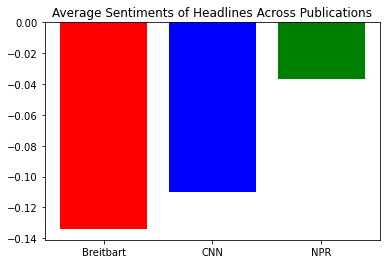

In [15]:
sentiments = [news[news['publication'] == 'Breitbart']['title_sentiment'].mean(), news[news['publication'] == 'CNN']['title_sentiment'].mean(), news[news['publication'] == 'NPR']['title_sentiment'].mean()]
publications = ['Breitbart', 'CNN', 'NPR']
colors = ['red', 'blue', 'green']

plt.bar(publications, sentiments, color = colors);
plt.title('Average Sentiments of Headlines Across Publications');

### The average total mean of the sentiment distribution is negative, which is to be expected, news is often negative, and negative stories are often overreported. But regarless of which samples we get each time we rerun this notebook, of the news sources,CNN and Breitbart are always more negative, while NPR is the most neutral. This is well-reflected in the bar chart, which shows the negative sentiments across publications. This could be because CNN and Breitbart choose to write about more negative topics, or that they generally write more negatively.

### The data could benefit from visual representation, so that we can see how often each source is more negative or positive. To show this, we made a histograms of combined sentiment of all the news sources, then from each specific publication. 

In [16]:
#creating a histogram plot of sentiment distribution based on the composite sentiment 
cnn = news[news['publication'] == 'CNN']
breitbart = news[news['publication'] == 'Breitbart']
npr = news[news['publication'] == 'NPR']

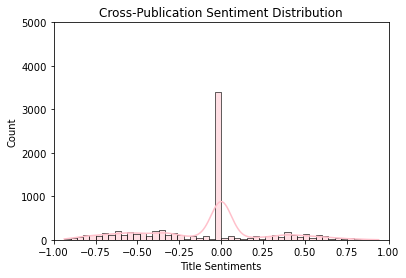

In [17]:
total_plot = sns.histplot(news['title_sentiment'], bins=50, kde=True, color = 'pink');
total_plot.set_title("Cross-Publication Sentiment Distribution")
total_plot.set(ylim=(0,5000));
total_plot.set(xlim=(-1,1));
total_plot.set_xlabel('Title Sentiments');

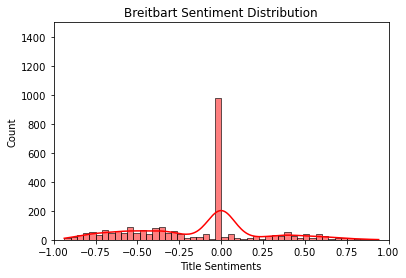

In [18]:
breitbart_plot = sns.histplot(breitbart['title_sentiment'], bins=50, kde=True, color = 'red')
breitbart_plot.set_title("Breitbart Sentiment Distribution")
breitbart_plot.set(ylim=(0,1500))
breitbart_plot.set(xlim=(-1,1));
breitbart_plot.set_xlabel('Title Sentiments');

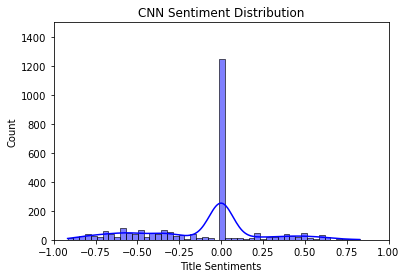

In [19]:
cnn_plot = sns.histplot(cnn['title_sentiment'], bins=50, kde=True, color = 'blue');
cnn_plot.set_title("CNN Sentiment Distribution");
cnn_plot.set(ylim=(0,1500));
cnn_plot.set(xlim=(-1,1));
cnn_plot.set_xlabel('Title Sentiments');

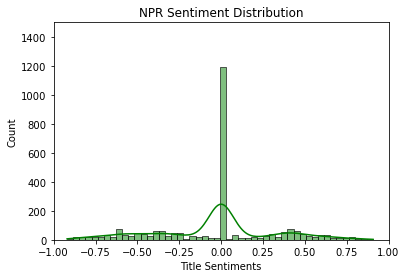

In [20]:
npr_plot = sns.histplot(npr['title_sentiment'], bins=50, kde=True, color = 'green');
npr_plot.set_title("NPR Sentiment Distribution");
npr_plot.set(ylim=(0,1500));
npr_plot.set(xlim=(-1,1));
npr_plot.set_xlabel('Title Sentiments');

### For all of these graphs, we can see an obvious similarity: the large column of zero sentiments in the middle. This means a lot of headlines are being evaluated as having complete neutral sentiment. Is this is indicative of the writers of these publications clearly trying to craft the most neutral titles as possible? Or is it that many headlines have complete neutral sentiment due to shortness of title, errors in the stemmer, and/or frequent uses of names?
### We want to observe what is being said in these large, neutral columns, and if they're worth analysing at all. So let's see the top ten words for each column. 

In [21]:
sentiment_free = news[news.title_sentiment == 0.0]

breitbart_0sent = sentiment_free[sentiment_free['publication'] == 'Breitbart']
cnn_0sent = sentiment_free[sentiment_free['publication'] == 'CNN']
npr_0sent = sentiment_free[sentiment_free['publication'] == 'NPR']

total_worddist = sentiment_free['tokenized_list'].apply(pd.Series).stack()
total_fdist_most = FreqDist(total_worddist)

breitbart_worddist = breitbart_0sent['tokenized_list'].apply(pd.Series).stack()
bb_fdist_most = FreqDist(breitbart_worddist)

CNN_worddist = cnn_0sent['tokenized_list'].apply(pd.Series).stack()
cnn_fdist_most = FreqDist(CNN_worddist)
NPR_worddist = npr_0sent['tokenized_list'].apply(pd.Series).stack()
npr_fdist_most = FreqDist(NPR_worddist)


In [22]:
sentiment_free

,index,title,publication,tokenized_list,title_sentiment
1,10862,cuban immigr behind deadli rampag texa,Breitbart,"[cuban, immigr, behind, deadli, rampag, texa]",0.0
3,11364,acosta trump call conserv media describ fix,Breitbart,"[acosta, trump, call, conserv, media, describ,...",0.0
4,9495,sever state sue trump new immigr execut order,Breitbart,"[sever, state, sue, trump, new, immigr, execut...",0.0
8,18004,bloomberg donald trump global deal reveal trou...,Breitbart,"[bloomberg, donald, trump, global, deal, revea...",0.0
9,24488,fbi new york bomber rahami bought suppli ebay ...,Breitbart,"[fbi, new, york, bomber, rahami, bought, suppl...",0.0
...,...,...,...,...,...
7483,4381,simon tolkien draw famou grandfath experi man ...,NPR,"[simon, tolkien, draw, famou, grandfath, exper...",0.0
7490,10239,carlo santana break band trailblaz sound,NPR,"[carlo, santana, break, band, trailblaz, sound]",0.0
7493,12192,wild bird team human guid honey,NPR,"[wild, bird, team, human, guid, honey]",0.0
7494,6834,kushner famili busi pitch china prompt questio...,NPR,"[kushner, famili, busi, pitch, china, prompt, ...",0.0


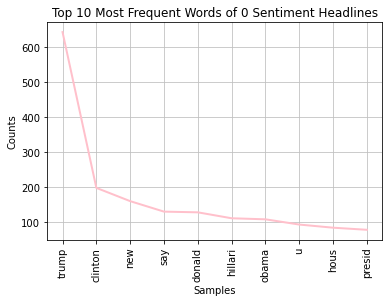

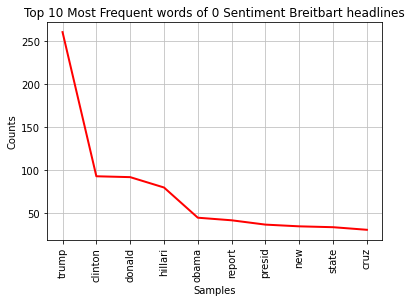

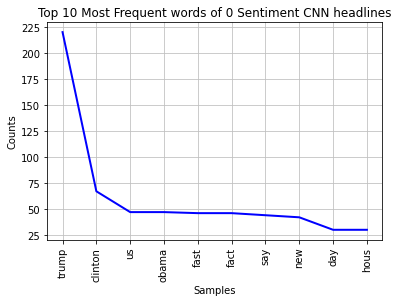

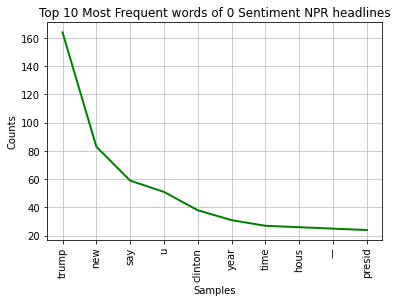

In [23]:
total_fdist_most.plot(10, cumulative=False, color = 'pink', title = 'Top 10 Most Frequent Words of 0 Sentiment Headlines');
bb_fdist_most.plot(10, cumulative=False, color = 'red', title = 'Top 10 Most Frequent words of 0 Sentiment Breitbart headlines');
cnn_fdist_most.plot(10, cumulative=False, color = 'blue', title = 'Top 10 Most Frequent words of 0 Sentiment CNN headlines');
npr_fdist_most.plot(10, cumulative=False, color = 'green', title = 'Top 10 Most Frequent words of 0 Sentiment NPR headlines');

### Well, it seems like the words of the neutral titles *are* largely a reflection of names, who the articles are talking about. Since names are always given 0 weight, it follows that the most frequent word across the US news sources is that of the US president during the data's time of data collection, 2015-2019. The words seem to be similar across news publications, but notably, NPR seems to name-drop the least, with only two of its most frequent words being names of politicians, and Breitbart seems to have the most, with six of the top ten being names of US political figures; CNN sits at three. 

### This could indicate that Breitbart talks about the US political sphere more than CNN or NPR, and that CNN and NPR talk more about general US news. But let's see how these publications talk about their chosen news material. 


### To view the data with a more critical lens, we decided to remove all of the zero sentiments across the board. It is important to note that both NPR and CNN have nearly three hundred more sentiment neutral titles than Breitbart, but we feel that the data can be analyzed adequately without the large column in the middle. By removing the neutral titles, we will be able to see the general skew of articles that have more polar sentiments, and hopefully answer our question of whether the more poltically polar sources have more polar sentiment.

In [24]:
#get rid of 0 values (outlier)
news = news[news.title_sentiment != 0]
news.head()
##Pay attention to the words that are not stemmed properly!!

,index,title,publication,tokenized_list,title_sentiment
0,25610,number govern employe surpass manufactur job 9...,Breitbart,"[number, govern, employe, surpass, manufactur,...",0.0772
2,22143,whoop vox disprov gender pay gap accid,Breitbart,"[whoop, vox, disprov, gender, pay, gap, accid]",-0.1027
5,9398,dem rep crowley peopl around world frighten tr...,Breitbart,"[dem, rep, crowley, peopl, around, world, frig...",-0.3400
6,12096,robert reich democrat parti bad shape sinc 1920,Breitbart,"[robert, reich, democrat, parti, bad, shape, s...",-0.5423
7,13076,detroit free press sport op ed insist player b...,Breitbart,"[detroit, free, press, sport, op, ed, insist, ...",0.5106


### This will probably move the average sentiment to the left, but let's check anyway.

In [25]:
news['title_sentiment'].mean()

-0.1709891050583657

In [26]:
#are there any 0 vals left? 
(news['title_sentiment'] == 0).sum()

0

In [27]:
breitbart = news[news['publication'] == 'Breitbart']
cnn = news[news['publication'] == 'CNN']
npr = news[news['publication'] == 'NPR']

print('BREITBART, CNN, NPR sentiment averages, without the zero sentiment headlines, respectively:')
breitbart['title_sentiment'].mean(), cnn['title_sentiment'].mean(), npr['title_sentiment'].mean()

BREITBART, CNN, NPR sentiment averages, without the zero sentiment headlines, respectively:


(-0.21967859947643886, -0.21931609561752968, -0.06937291196388293)

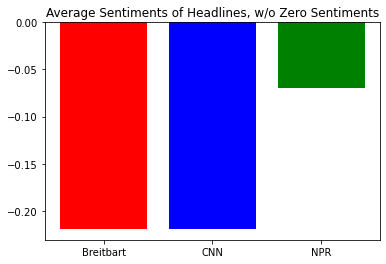

In [28]:
sentiments = breitbart['title_sentiment'].mean(), cnn['title_sentiment'].mean(), npr['title_sentiment'].mean()
publications = ['Breitbart', 'CNN', 'NPR']
colors = ['red', 'blue', 'green']

plt.bar(publications, sentiments, color = colors);
plt.title('Average Sentiments of Headlines, w/o Zero Sentiments');

### By removing the 0 column, we about doubled the average mean sentiment across the board. Seeing how this was a uniform transformtion of the data, we feel comfortable analyzing the data without the 0 values moving forward. Let's take a look at the distributions now: 

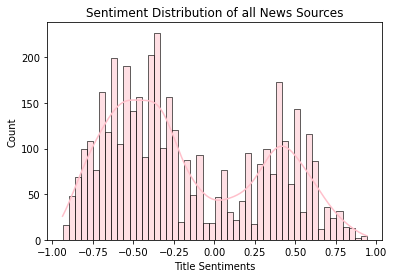

In [29]:
total_plot = sns.histplot(news['title_sentiment'], bins=50, kde=True, color = 'pink');

total_plot.set_title("Sentiment Distribution of all News Sources");
plt.xlabel('Title Sentiments');

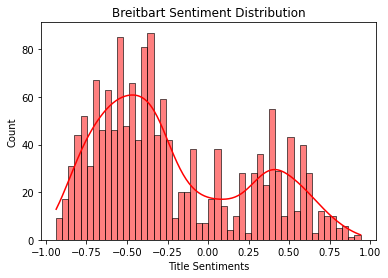

In [30]:
breitbart_plot = sns.histplot(breitbart['title_sentiment'], bins=50, kde=True, color = 'red')

breitbart_plot.set_title("Breitbart Sentiment Distribution");
plt.xlabel('Title Sentiments');

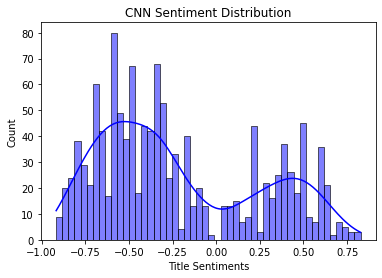

In [31]:
cnn_plot = sns.histplot(cnn['title_sentiment'], bins=50, kde=True, color = 'blue');
cnn_plot.set_title("CNN Sentiment Distribution");
plt.xlabel('Title Sentiments');

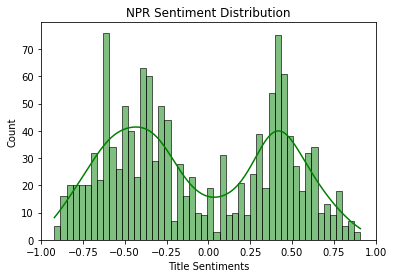

In [32]:
npr_plot = sns.histplot(npr['title_sentiment'], bins=50, kde=True, color = 'green');

npr_plot.set_title("NPR Sentiment Distribution");
npr_plot.set(xlim=(-1,1));
plt.xlabel('Title Sentiments');

### By removing the column in the middle, we can see a clearer pattern emerge. All of the news sources have an obvious bimodal distribution. But <font color='red'>Breitbart</font>and <font color='blue'>CNN</font> seem to have a skew to the right. 
### So we now combine the graphs to compare the general sentiment distribution of each source.

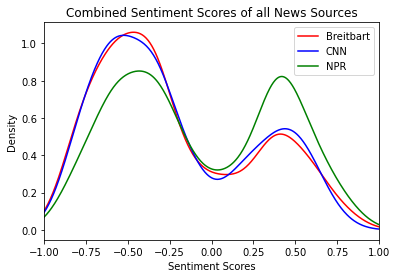

In [33]:
#To combine all the sentiment scores without the 0 sentiment data. 
breitbart = news[news['publication'] == 'Breitbart']
cnn = news[news['publication'] == 'CNN']
npr = news[news['publication'] == 'NPR']

Breitbart = list(breitbart['title'].values)
CNN = list(cnn['title'].values)
NPR = list(npr['title'].values)


#function that will output the dataframe that stores sentiment information
def get_sentiments(input_list):
    output = pd.DataFrame()
    for sentence in input_list:
        ss = analyser.polarity_scores(sentence)
        ss['sentence'] = sentence
        output = output.append(ss, ignore_index=True)
    return output

breitbart_sentiments = get_sentiments(Breitbart)
breitbart_sentiments['compound'].plot.density(color = 'red', label = 'Breitbart')

cnn_sentiments = get_sentiments(CNN)
cnn_sentiments['compound'].plot.density(color = 'blue', label = 'CNN')

npr_sentiments = get_sentiments(NPR)
npr_sentiments['compound'].plot.density(color = 'green', label = 'NPR')


plt.legend(loc = 'upper right')
plt.xlabel('Sentiment Scores')
plt.xlim(-1,1);
plt.title("Combined Sentiment Scores of all News Sources");

### By showing all the news sentiment scores on one graph, we can clearly see that CNN and Breitbart have a distinct rightward skew, meaning that the average sentiment of their article titles is more negative than positive. This is in contrast to NPR, which shows a more balanced bimodal distribution with no clear skew to the left or to the right. CNN also seems to be slightly more negative than Breitbart. 


### But we should still ask the question, which words show up the most for all the publications, for each individual publication? Will these words be more negative, positive, or neutral? To do this, we will take the stemmed and stop word removed titles and look at them for the top word frequencies.

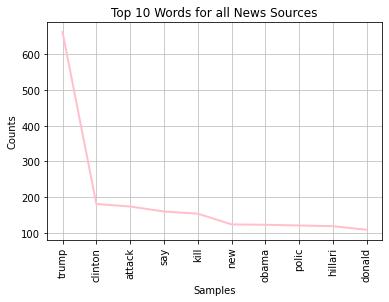

In [34]:
combined_news_publications = news['tokenized_list'].apply(pd.Series).stack()
# calculation word frequency
fdist_most = FreqDist(combined_news_publications)

# Frequency Distribution Plot - top 10 most common words
fdist_most.plot(10, cumulative=False, color = 'pink', title = 'Top 10 Words for all News Sources');

In [35]:
totalNPR = news['tokenized_list'][(news['publication'] == 'NPR')].apply(pd.Series).stack()
totalCNN = news['tokenized_list'][(news['publication'] == 'CNN')].apply(pd.Series).stack()
totalBreitbart = news['tokenized_list'][(news['publication'] == 'Breitbart')].apply(pd.Series).stack()

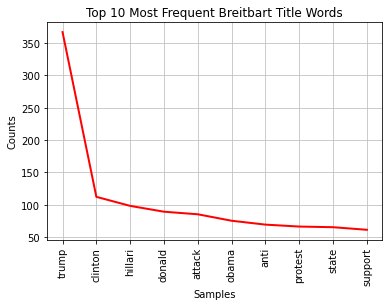

In [36]:
fdist_most = FreqDist(totalBreitbart) 
fdist_most.plot(10, cumulative=False, color = 'red', title = 'Top 10 Most Frequent Breitbart Title Words');

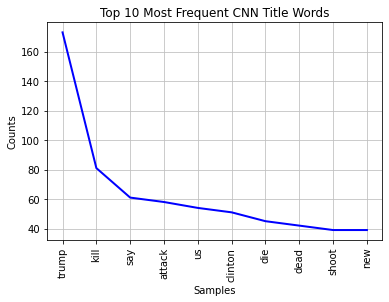

In [37]:
fdist_most = FreqDist(totalCNN) 
fdist_most.plot(10, cumulative=False, color = 'blue', title = 'Top 10 Most Frequent CNN Title Words');

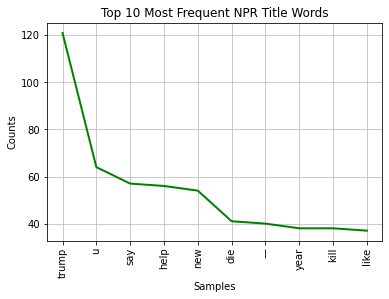

In [38]:
fdist_most = FreqDist(totalNPR) 
fdist_most.plot(10, cumulative=False, color = 'green', title = 'Top 10 Most Frequent NPR Title Words');

### The sentiment-focused plot of most frequent words still reflects that names are most frequently used in Breitbart titles. But, there's a distinct similarity between each of the publications. 

### We can see from that the name "Trump" is the most common word used, which can be ascribed to the time in which the data was collected, starting from around 2015 and through Trump's presidency. The rest of the distributions seem to show a propensity for intensely negative words, such as 'kill', 'die', 'attack', and 'death', which could be due to news outlets over-reporting violent events. 


### This can help us answer our question though. If these sources are reporting on different things, their sentiments will be different. These graphs show us that all the sources will have a fair amount of data in common regarding Trump, so, how about we look at all the news titles that include the word 'Trump' and see the sentiments as they relate to the former president. 

### By looking at how each source reports on the same topic, we might be able to find better comparison. For our hypothesis to continue to hold water, NPR, should report about the same when talking about Trump vs. not, and Breitbart and CNN should have a distinct difference. Let's test it by splitting the dataset into stories about Trump, and not about Trump. 

In [39]:
#About 700/2500 titles include Trump's name 
total_trump = news[news['title'].str.contains('trump')]
not_trump = news[~news['title'].str.contains('trump')]
not_trump.shape, total_trump.shape

((3457, 5), (655, 5))

In [40]:
breit_trump = breitbart[breitbart['title'].str.contains('trump')]
npr_trump = npr[npr['title'].str.contains('trump')]
cnn_trump = cnn[cnn['title'].str.contains('trump')]

not_breit_trump = breitbart[~breitbart['title'].str.contains('trump')]
not_npr_trump = npr[~npr['title'].str.contains('trump')]
not_cnn_trump = cnn[~cnn['title'].str.contains('trump')]

In [41]:
print('Average sentiment of: \n')
print(' ALL Headlines:                  ', news['title_sentiment'].mean())
print(' Headlines REGARDING TRUMP:      ', total_trump['title_sentiment'].mean())
print(' Headlines NOT regarding Trump:  ', not_trump['title_sentiment'].mean())

Average sentiment of: 

 ALL Headlines:                   -0.1709891050583657
 Headlines REGARDING TRUMP:       -0.10566183206106892
 Headlines NOT regarding Trump:   -0.18336670523575332


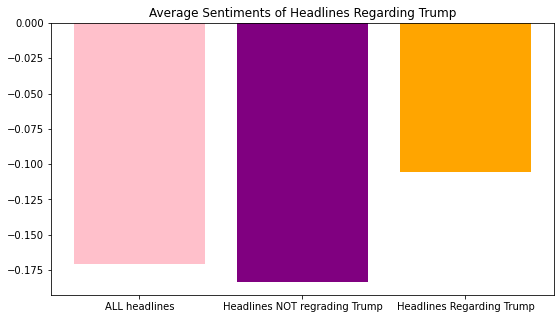

In [42]:
trumps = (news['title_sentiment'].mean(), not_trump['title_sentiment'].mean(), total_trump['title_sentiment'].mean())
publications = ['ALL headlines', 'Headlines NOT regrading Trump', 'Headlines Regarding Trump']
colors = ['pink', 'purple', 'orange']
plt.figure(figsize=(9, 5))

plt.bar(publications, trumps, color = colors);
plt.title('Average Sentiments of Headlines Regarding Trump');

### Interestingly, articles regarding Trump are more positive on average, let's see why. This could possibly make our hypothesis stronger, because it would show evidence that a polarizing topic would have *more* effect on the sentiment of the headlines of poltically polar sources than neutral sources. 

### What do they talk about in Trump articles that make them more postive on average? We will make a chart that shows words of articles that regard Trump, and articles that do not. 

In [43]:
not_trump_words = not_trump['tokenized_list'].apply(pd.Series).stack()
trump_words = total_trump['tokenized_list'].apply(pd.Series).stack()

fdist_not_trump = FreqDist(not_trump_words)
fdist_trump = FreqDist(trump_words)


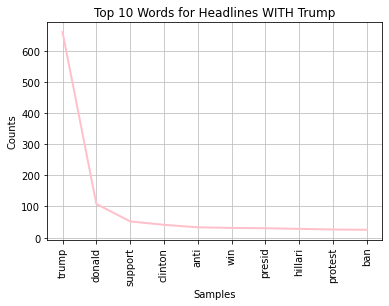

In [44]:
fdist_trump.plot(10, cumulative=False, color = 'pink', title = 'Top 10 Words for Headlines WITH Trump');

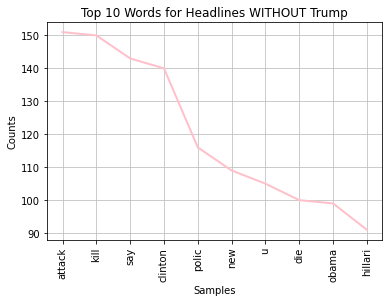

In [45]:
fdist_not_trump.plot(10, cumulative=False, color = 'pink', title = 'Top 10 Words for Headlines WITHOUT Trump');

### Oh, that makes sense! Articles that do include Trump will almost certainly be more neutral, because his name is in the article title, which already makes it more neutral (given that it's a name) and the news regarding him had a lot to do with the political sphere. This means that lots of the words in the title will have the names of other politicians. Additionally, this is opposed to the articles that do NOT mention Trump, which the data shows were probably more about violent crimes given the words in the distribution. 

### Let's look at the distribution of title sentiments regarding Trump. 

    Combined Sentiment Distribution Regarding Trump


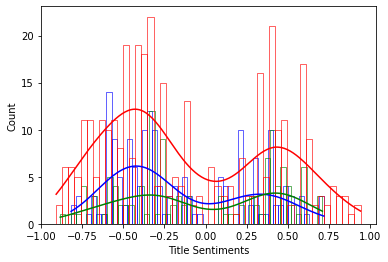

In [46]:
print('    Combined Sentiment Distribution Regarding Trump')
cnn_trump_plot = sns.histplot(cnn_trump['title_sentiment'], bins=50, kde=True, color = 'blue', fill=False);
npr_trump_plot = sns.histplot(npr_trump['title_sentiment'], bins=50, kde=True, color = 'green', fill=False);
breit_trump_plot = sns.histplot(breit_trump['title_sentiment'], bins=50, kde=True, color = 'red', fill=False);
plt.xlabel('Title Sentiments');

### Obviously, these sources will feel differently about different topics, as we specifically selected them to be on different parts of the political spectrum. However, this plot shows us that when it comes to the most frequently talked about figure cross-publication, their sentiments match their overall sentiments pretty closely, However, this plot does confirm an earlier suspicion we found when looking at word frequency, that Breitbart simply talks about Trump, and other political firgues, more. 

### So, let's combine this data, and see how the different publications report on the same topic. 

### If we find that NPR  is more neutral about Trump, that is, if there’s no difference in how they talk about Trump vs other things, *and* we find that CNN and Breitbart are more negative about Trump than NPR is, then our hypothesis, that there will be correltation between political polarity and headline polarity, still holds water. 

In [47]:
print('Average sentiment of: \n')
print(' ALL Breitbart articles:                ', breitbart['title_sentiment'].mean())
print(' Breitbart articles regarding Trump:    ', breit_trump['title_sentiment'].mean())
print(' Breitbart articles NOT regarding Trump:', not_breit_trump['title_sentiment'].mean(), '\n')

print(' ALL CNN articles:                      ', cnn['title_sentiment'].mean())
print(' CNN articles regarding Trump:          ', cnn_trump['title_sentiment'].mean())
print(' CNN NOT regarding Trump:               ', not_cnn_trump['title_sentiment'].mean(), '\n')

print(' ALL NPR articles:                      ', npr['title_sentiment'].mean())
print(' NPR articles regarding Trump:          ', npr_trump['title_sentiment'].mean())
print(' NPR articles NOT regarding Trump:      ', not_npr_trump['title_sentiment'].mean())

Average sentiment of: 

 ALL Breitbart articles:                 -0.21967859947643886
 Breitbart articles regarding Trump:     -0.10629861878453041
 Breitbart articles NOT regarding Trump: -0.25487890222984494 

 ALL CNN articles:                       -0.21931609561752968
 CNN articles regarding Trump:           -0.1613953488372092
 CNN NOT regarding Trump:                -0.22851495844875339 

 ALL NPR articles:                       -0.06937291196388293
 NPR articles regarding Trump:           -0.02453223140495868
 NPR articles NOT regarding Trump:       -0.07386440397351016


### That's a lot of data, we should visualize the distributions of these articles. 

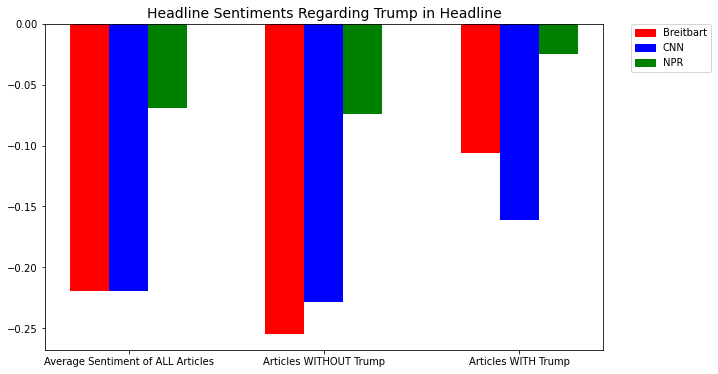

In [48]:
import matplotlib.patches as mpatches
import numpy as np
breitbarts = (breitbart['title_sentiment'].mean(), not_breit_trump['title_sentiment'].mean(), breit_trump['title_sentiment'].mean())
cnns = (cnn['title_sentiment'].mean(), not_cnn_trump['title_sentiment'].mean(), cnn_trump['title_sentiment'].mean())
nprs = (npr['title_sentiment'].mean(), not_npr_trump['title_sentiment'].mean(), npr_trump['title_sentiment'].mean())
width = 0.2
ind = np.arange(3)

plt.figure(figsize=(10, 6))

red_patch = mpatches.Patch(color='red', label='Breitbart')
blue_patch = mpatches.Patch(color='blue', label='CNN')
green_patch = mpatches.Patch(color='green', label='NPR')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.,handles=[red_patch, blue_patch, green_patch])

plt.title("Headline Sentiments Regarding Trump in Headline", size = 14)
plt.xticks(ind+width,['Average Sentiment of ALL Articles', 'Articles WITHOUT Trump', 'Articles WITH Trump'])


plt.bar(ind, breitbarts, width= width, color = 'r')
plt.bar(ind+width, cnns, width, color = 'b')
plt.bar(ind+width*2, nprs, width, color = 'g')
plt.show()

### In fact, we see that CNN and Breitbart are still more negative than NPR, implying that Breitbart does write more favorable headlines about trump, and cnn writes less favorable headlines. We see clearly that regardless of a favorable or unfavorable common topic, CNN and Breitbart continue to be more negative than NPR. 

## Most importantly, we see that regardless of polarizing figures, NPR is unaffected 

# Ethics & Privacy
### For the “All the news” dataset, the information about the articles are not the product of scraping an entire site but rather their more prominently placed articles, so the sentiment analysis we are planning on conducting could result in a conclusion about only a part of what the news outlet releases and potentially lead to a bias for which one is the most “positive”, “neutral”, and/or “negative”. However, to handle this, we will make sure to take into consideration the fact that the articles that we have data of may only be the ones that show up on the homepage and do not represent the news source as a whole during the process of communicating our analysis.

# Conclusions & Discussion

### As for our original hypothesis: 
#### "*We hypothesize that the two more politically polar news sources, Breitbart and CNN, will have more polar sentiment (as in frequently positive or negative), and the more centrist news source, NPR, will be more neutral in sentiment.* 

### We feel that our data does support our hypothesis. We origianlly predicted that CNN and Breitbart would be more polar, and that NPR would be thoroughly neutral, as it is in its political leanings. NPR did end up being visibly more neutral than the other two, which were both strongly skewed to the right. We simply wanted to find an effect of political leaning on general sentiment, and found that the two more political sources were more negative on average. From this, we can reject our null hypothesis, that all the publications would be the same in their sentiments, and conclude that, in the case of Breitbart, CNN, and  NPR, the more polar the news source, the more polar the sentiment of the news headlines. 

## Limitations
### If we were to want to make a more general conclusion about whether political leaning of a news source directly affected or even predicted the general sentiment of its headlines, we would want to do a more in-depth analysis with more politically diverse sources, such as a center-left, center-right, center-center-right, etc. across a longer period of time. Yet there is not a direct measure for the *exact* politcal leaning of a source. As such, it would be difficult to draw a positive or negative correlation without a more objective, numeric measurement. 

# Team Contributions

For the most part, our contributions were equal, as we tended to work as a group for EDA, data visualizations, analysis, and most of the troubleshooting for the assignment. Here are the individual contributions: 

- Bridget Egan 
    - Created powerpoint presentation for video 
- Dillan Merchant
    - Made final video 
- Jennifer Hang
    - Formatted final project, wrote up the ethics section of the notebook 
- Sam Zakeri
    - Filmed and wrote conclusion and ethics part of the video 
- Connie Chang
    - Filmed and wrote introduction of the video 

___________________________________